In [ ]:
from pathlib import Path
import cartopy
import cartopy.crs as ccrs
import pyproj
import numpy as np
from matplotlib import pyplot as plt
import salem

In [ ]:
import socket
hostname = socket.gethostname()

if hostname.lower().startswith('chinook'):
    fiboreal = "/import/FIREICE/fiboreal/"
else:
    fiboreal = "/Volumes/FIBOREAL/"

chrisdir = Path(fiboreal) / "cwaigl"
fiwepsdir = Path(fiboreal) / "fiweps_data"
era5dir = Path(fiboreal) / "cds"

hostname, fiboreal, chrisdir 

('Christines-MacBook-Pro.local',
 '/Volumes/FIBOREAL/',
 PosixPath('/Volumes/FIBOREAL/cwaigl'))

In [ ]:
datadir = chrisdir / "WRF_sample_files/"
datadir, "exists" if datadir.exists() else "doesn't exist"

(PosixPath('/Volumes/FIBOREAL/cwaigl/WRF_sample_files'), 'exists')

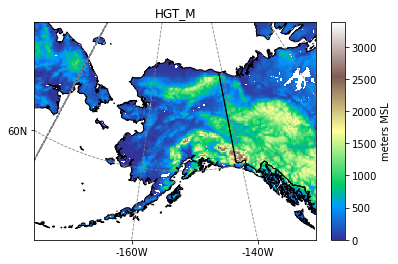

In [ ]:
ds = salem.open_wrf_dataset(datadir / 'geo_em.d01.nc')
ds.HGT_M.where(ds.LANDMASK).salem.quick_map(cmap='terrain')

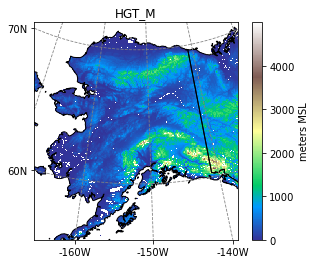

In [ ]:
ds = salem.open_wrf_dataset(datadir / 'geo_em.d02.nc')
ds.HGT_M.where(ds.LANDMASK).salem.quick_map(cmap='terrain')

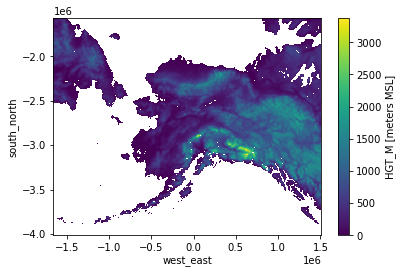

In [ ]:
ds.HGT_M.where(ds.LANDMASK).plot()

In [ ]:
wrf_proj = pyproj.Proj(proj='stere', # projection type: Stereographic
                       lat_ts=ds.TRUELAT1, # not distorted
                       lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON, # Center point
                       a=6370000, b=6370000) # This is it! The Earth is a perfect sphere

In [ ]:
wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')
e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)
# Grid parameters
dx, dy = ds.DX, ds.DY
nx, ny = ds.dims['west_east'], ds.dims['south_north']
# Down left corner of the domain
x0 = -(nx-1) / 2. * dx + e
y0 = -(ny-1) / 2. * dy + n
# 2d grid
xx, yy = np.meshgrid(np.arange(nx) * dx + x0, np.arange(ny) * dy + y0)

/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_49724/4207070889.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_49724/2909885457.py:2: UserWarning: "true_scale_latitude" parameter is only used for polar stereographic projections. Consider the use of "scale_factor" instead.
  stere = ccrs.Stereographic(globe=globe, # important!


Text(0.5, 1.0, 'Outer domain, dx = 12 km, land mask applied')

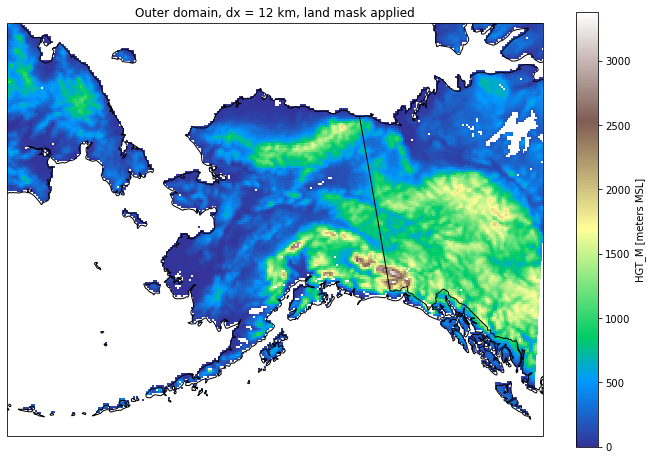

In [ ]:
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=6370000, semiminor_axis=6370000)
stere = ccrs.Stereographic(globe=globe, # important!
                            central_longitude=ds.STAND_LON, central_latitude=ds.MOAD_CEN_LAT,
                            true_scale_latitude=ds.TRUELAT1,
                            )
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=stere)
ds.HGT_M.where(ds.LANDMASK).plot(ax=ax, transform=ds.salem.cartopy(), cmap='terrain')
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.set_extent([xx.min(), xx.max(), yy.min(), yy.max()], crs=stere)
ax.set_title("Outer domain, dx = 12 km, land mask applied")